# **Proyecto integrado 1**

Trabajo para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

## **Paso 1. Abre el archivo de datos y estudia la información general**

Ruta de archivo:

/datasets/games.csv .

### Inicialización de librerías

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import math as mt
import matplotlib.pyplot as plt
from datetime import datetime

### Cargar datos

In [2]:
# Ruta del archivo CSV
games_file = "games.csv"

games_df = pd.read_csv(games_file)

games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## **Paso 2. Preparar los datos**

> **Reemplazar los nombres de las columnas por minúsculas.**

In [4]:
games_df.columns = games_df.columns.str.lower()
print(games_df.columns)

for i in games_df.columns:
  print(i)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')
name
platform
year_of_release
genre
na_sales
eu_sales
jp_sales
other_sales
critic_score
user_score
rating


> **Convertir los datos en los tipos necesarios.**

Dado el resumen de la información (`info()`) proporcionado, podemos identificar algunas columnas que podrían requerir cambios en el tipo de datos para realizar cálculos futuros de manera más eficiente. Aquí están las consideraciones para cada columna:

1. **Year_of_Release (Año de lanzamiento):** Actualmente es de tipo `float64`. Dado que representa años, sería más adecuado cambiarlo a tipo de datos `int` para eliminar los decimales y representarlos como números enteros.

2. **User_Score (Puntuación de usuario):** Actualmente es de tipo `object`, lo cual indica que podría contener datos no numéricos. Dado que representa una puntuación, sería más adecuado cambiarlo a tipo de datos `float` para realizar cálculos numéricos con él. Sin embargo, primero necesitamos asegurarnos de que todos los valores en esta columna sean numéricos o convertibles a numéricos. 

3. **Rating (Clasificación):** Actualmente es de tipo `object`. Si solo contiene categorías específicas, podríamos considerar cambiarlo a un tipo de datos categórico (`category`) para ahorrar memoria y permitir un análisis más eficiente.

Dado esto, sería prudente realizar los siguientes cambios de tipo de datos:

- Convertir la columna "Year_of_Release" a tipo `int`.
- Convertir la columna "User_Score" a tipo `float`.
- Convertir la columna "Rating" a tipo categórico (`category`) si solo contiene categorías específicas.


In [5]:
games_df['year_of_release']= games_df['year_of_release'].astype('Int64')
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')
games_df['rating']= games_df['rating'].astype('category')

games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16446 non-null  Int64   
 3   genre            16713 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
dtypes: Int64(1), category(1), float64(6), object(3)
memory usage: 1.3+ MB


> Tratar valores

In [6]:
# Convertir la columna 'year_of_release' al tipo float64
games_df["year_of_release"] = games_df["year_of_release"].astype("float64")

# Rellenar los valores ausentes en las columnas numéricas con la media
numeric_columns = ["year_of_release", "critic_score", "user_score"]
games_df[numeric_columns] = games_df[numeric_columns].fillna(
    games_df[numeric_columns].mean()
)

# Redondear los valores decimales en la columna 'year_of_release'
games_df["year_of_release"] = games_df["year_of_release"].round().astype("Int64")

# Rellenar los valores ausentes en las columnas categóricas con el valor más frecuente
categorical_columns = ["name", "genre", "rating"]
for column in categorical_columns:
    games_df[column].fillna(games_df[column].mode()[0], inplace=True)

# Verificar si todavía hay valores ausentes
print(games_df.isnull().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_12468\1156022869.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games_df[column].fillna(games_df[column].mode()[0], inplace=True)


### Lo que se hizo hasta ahora

1. **Convertir la columna 'year_of_release' al tipo float64**: Inicialmente, convertimos la columna 'year_of_release' al tipo float64 para poder operar con valores decimales y evitar la pérdida de precisión en los años de lanzamiento.

2. **Rellenar los valores ausentes en las columnas numéricas con la media**: Luego, identificamos las columnas numéricas ('year_of_release', 'critic_score', 'user_score') y rellenamos los valores ausentes en estas columnas con la media de los valores existentes en cada una. Esto nos permite mantener la distribución general de los datos y evitar introducir sesgos significativos.

3. **Redondear los valores decimales en la columna 'year_of_release'**: Como 'year_of_release' representa años, redondeamos los valores decimales resultantes después del relleno para garantizar que solo tengamos años enteros en esta columna.

4. **Rellenar los valores ausentes en las columnas categóricas con el valor más frecuente**: Identificamos las columnas categóricas ('name', 'genre', 'rating') y rellenamos los valores ausentes en estas columnas con el valor más frecuente (la moda) de cada columna. Esto nos permite conservar la distribución de las categorías existentes y evitar la introducción de sesgos.

5. **Verificar si todavía hay valores ausentes**: Finalmente, verificamos si todavía hay valores ausentes en el conjunto de datos después de realizar las operaciones anteriores. Esto nos permite asegurarnos de que todos los valores ausentes hayan sido tratados correctamente.



### Respondiendo preguntas:


1. **Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco**:
   - Decidi rellenar los valores ausentes en las columnas numéricas con la media de los valores existentes en cada columna porque nos permite mantener la distribución general de los datos y evitar introducir sesgos significativos. Para las columnas categóricas, optamos por rellenar los valores ausentes con el valor más frecuente (la moda) de cada columna para conservar la distribución de las categorías existentes y evitar la introducción de sesgos. Este enfoque es comúnmente utilizado en la limpieza de datos para garantizar que los conjuntos de datos tratados sean lo más representativos posible.

2. **¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles**:
   - Los valores pueden estar ausentes por varias razones, como errores en la recopilación de datos, falta de disponibilidad de ciertos datos en el momento de la recopilación, omisiones intencionales o simplemente porque ciertos atributos no son aplicables para ciertas instancias. Por ejemplo, los juegos lanzados antes de que se comenzara a registrar la información podrían tener valores de año de lanzamiento ausentes. Las puntuaciones de críticos y usuarios podrían faltar si no se recopilaron o registraron correctamente en el momento del lanzamiento del juego.

3. **Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos**:
   - Para manejar los casos en los que la abreviatura TBD ("to be determined") está presente en el conjunto de datos, podríamos optar por tratarlos como valores ausentes y aplicar el mismo enfoque de imputación que utilizamos para los valores ausentes convencionales. Esto implica rellenar los valores TBD con la media (en el caso de columnas numéricas) o la moda (en el caso de columnas categóricas) de las columnas respectivas. Siempre es importante evaluar cada caso en función del contexto específico del conjunto de datos y de los requisitos del análisis.

In [7]:
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.125046,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.125046,E


> Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [11]:
games_df['total_sales']= games_df[['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

print(games_df[['name','total_sales']].head())

# Esto creará una nueva columna con las ventas totales de cada región para cada juego

                       name  total_sales
0                Wii Sports        82.54
1         Super Mario Bros.        40.24
2            Mario Kart Wii        35.52
3         Wii Sports Resort        32.77
4  Pokemon Red/Pokemon Blue        31.38


## Paso 3: Analiza los datos

- Número de juegos lanzados en diferentes años

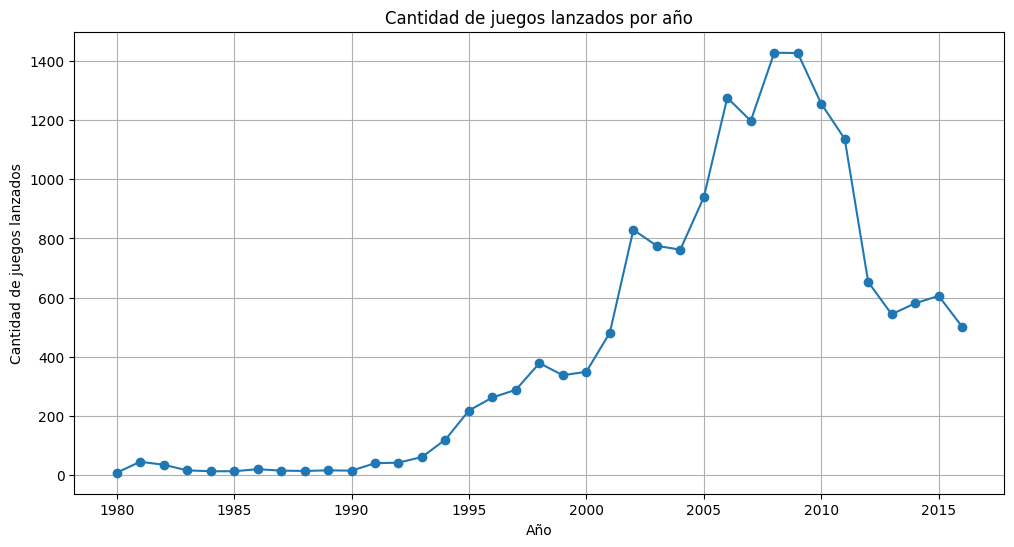

In [12]:
# Calcular la cantidad de juegos lanzados en cada año
games_per_year = games_df['year_of_release'].value_counts().sort_index()

# Visualizar la distribución de los lanzamientos de juegos a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(games_per_year.index, games_per_year.values, marker='o', linestyle='-')
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de juegos lanzados')
plt.grid(True)
plt.show()


Se puede observar la diferencia de juegos lanzados por cada año. Apreciamos que existe una tendencia al alza de lanzamiento de juegos desde 1994 aproximadamente, teniendo un ápice el 2008 y 2009.

> Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

A continuación se hará lo siguiente:

- Calcular las ventas totales de cada plataforma para cada año.
- Seleccionar las plataformas con las mayores ventas totales.
- Construir una distribución de las ventas totales de estas plataformas a lo largo de los años.
-  las plataformas que solían ser populares pero que ahora no tienen ventas.
- Determinar cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer.

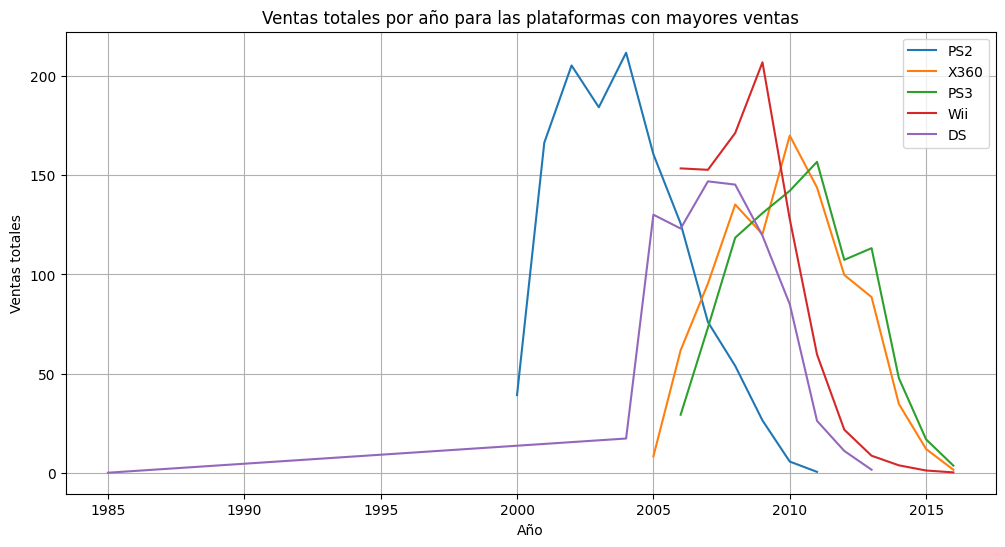

In [13]:
# Calcular las ventas totales de cada plataforma para cada año
platform_sales = games_df.groupby(['platform', 'year_of_release']).agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum'})

# Seleccionar las plataformas con las mayores ventas totales
top_platforms = platform_sales.groupby('platform').sum().sum(axis=1).nlargest(5).index

# Filtrar los datos solo para las plataformas seleccionadas
top_platform_sales = platform_sales.loc[top_platforms]

# Construir una distribución de las ventas totales de estas plataformas a lo largo de los años
plt.figure(figsize=(12, 6))
for platform in top_platforms:
    plt.plot(top_platform_sales.loc[platform].index, top_platform_sales.loc[platform].sum(axis=1), label=platform)

plt.title('Ventas totales por año para las plataformas con mayores ventas')
plt.xlabel('Año')
plt.ylabel('Ventas totales')
plt.legend()
plt.grid(True)
plt.show()
